# Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from churn_ml_project.data_loader import load_telco_data


In [3]:
data_path = '../data/dataset.csv' 
df = load_telco_data(data_path)

Veri seti başarıyla yüklendi. Boyut: (7043, 21)


In [4]:
print(f"Data shape: {df.shape}")
df.head()

Data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#Total Charges değişkeni object olarak gözüküyor ama aslında sayısal bir değişken
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="coerce")

In [26]:
df.dtypes["TotalCharges"]

dtype('float64')

In [27]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [30]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [31]:
df.duplicated().sum()

0

## Exploring Data

In [32]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('SeniorCitizen')
print("Sayısal değişkenler:", numerical_features)

Sayısal değişkenler: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [33]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('customerID')
categorical_features.append('SeniorCitizen')
print("Kategorik değişkenler:" , categorical_features)

Kategorik değişkenler: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


In [ ]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("-------------")

gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
-------------
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
-------------
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
-------------
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
-------------
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64
-------------
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64
-------------
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64
-------------
OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: proportion, dtype: float64
-------------
DeviceProtection
No       

## Univariate Analysis

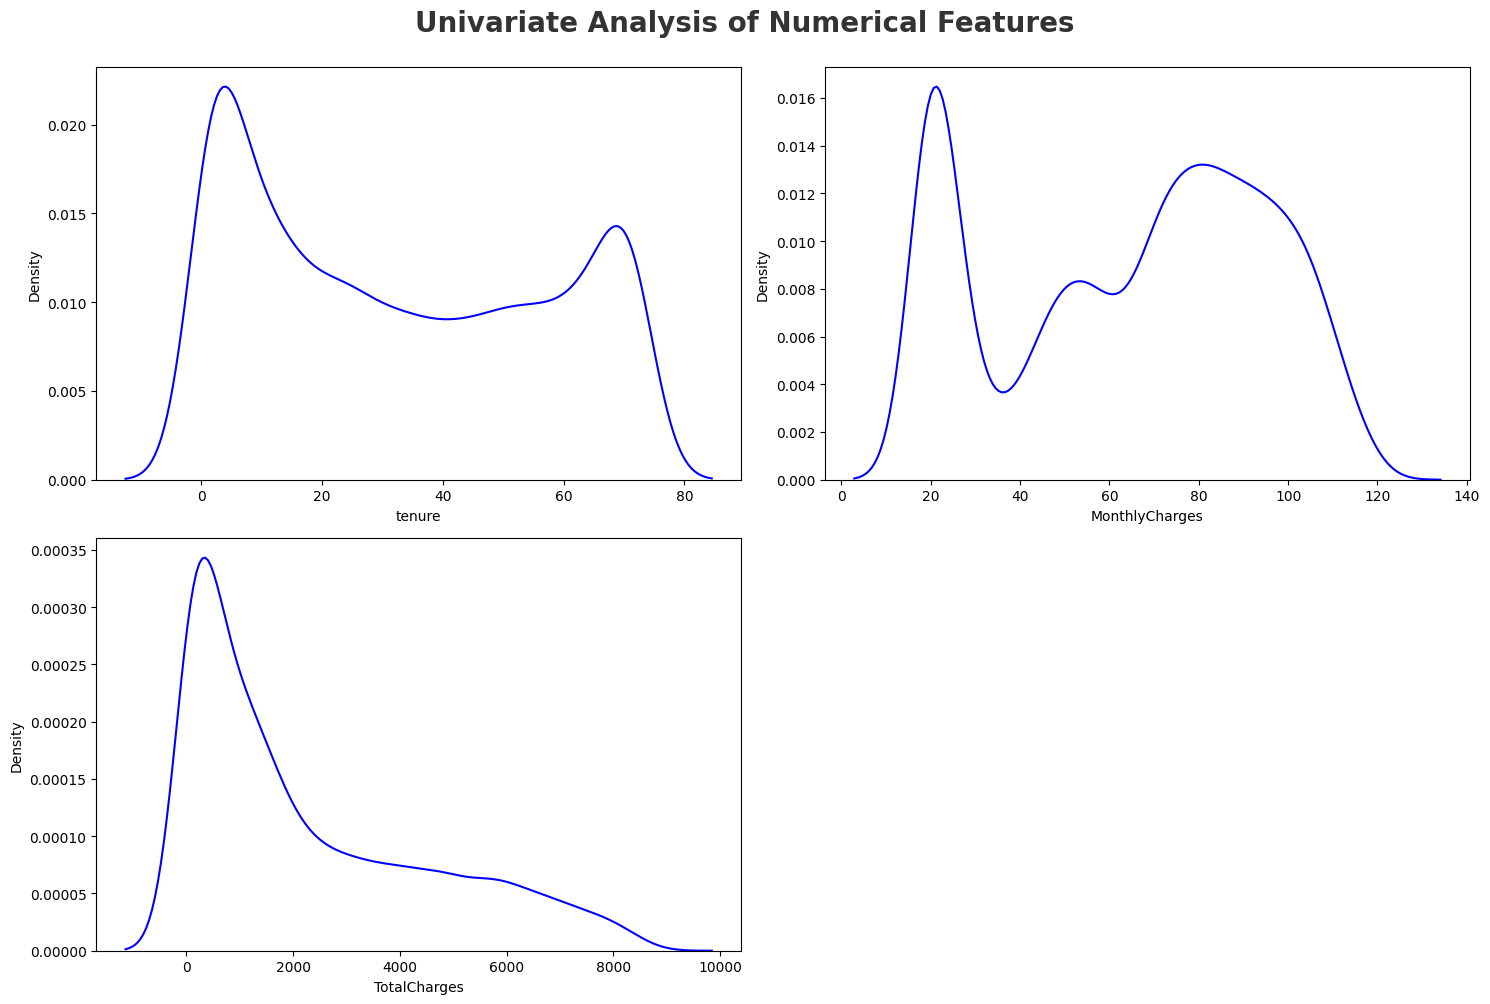

In [37]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [40]:
for col in numerical_features:
    print(f"{col} - Temel İstatistikler")
    print(f"Ortalama (mean): {df[col].mean():.2f}")
    print(f"Medyan (median): {df[col].median():.2f}")
    print(f"Mod (mode): {df[col].mode().values[0]:.2f}")
    print(f"Standart Sapma (std): {df[col].std():.2f}")
    print(f"Varyans (var): {df[col].var():.2f}")
    print("----------")

tenure - Temel İstatistikler
Ortalama (mean): 32.37
Medyan (median): 29.00
Mod (mode): 1.00
Standart Sapma (std): 24.56
Varyans (var): 603.17
----------
MonthlyCharges - Temel İstatistikler
Ortalama (mean): 64.76
Medyan (median): 70.35
Mod (mode): 20.05
Standart Sapma (std): 30.09
Varyans (var): 905.41
----------
TotalCharges - Temel İstatistikler
Ortalama (mean): 2283.30
Medyan (median): 1397.47
Mod (mode): 20.20
Standart Sapma (std): 2266.77
Varyans (var): 5138252.41
----------


* tenure : dağılım bimodal yapıda; müşteri kitlesi genellikle ya çok yeni ya da çok uzun süreli. Ortalama standart sapmanın biraz üzerinde
* monthlyCharges: dağılım hafif sağa çarpık
* totalcharges: dağılım sağa çarpık. Ort ve medyan arasındaki fark yüksek. ücret geçmişi olan bazı müşteriler çok uzun süredir şirkette

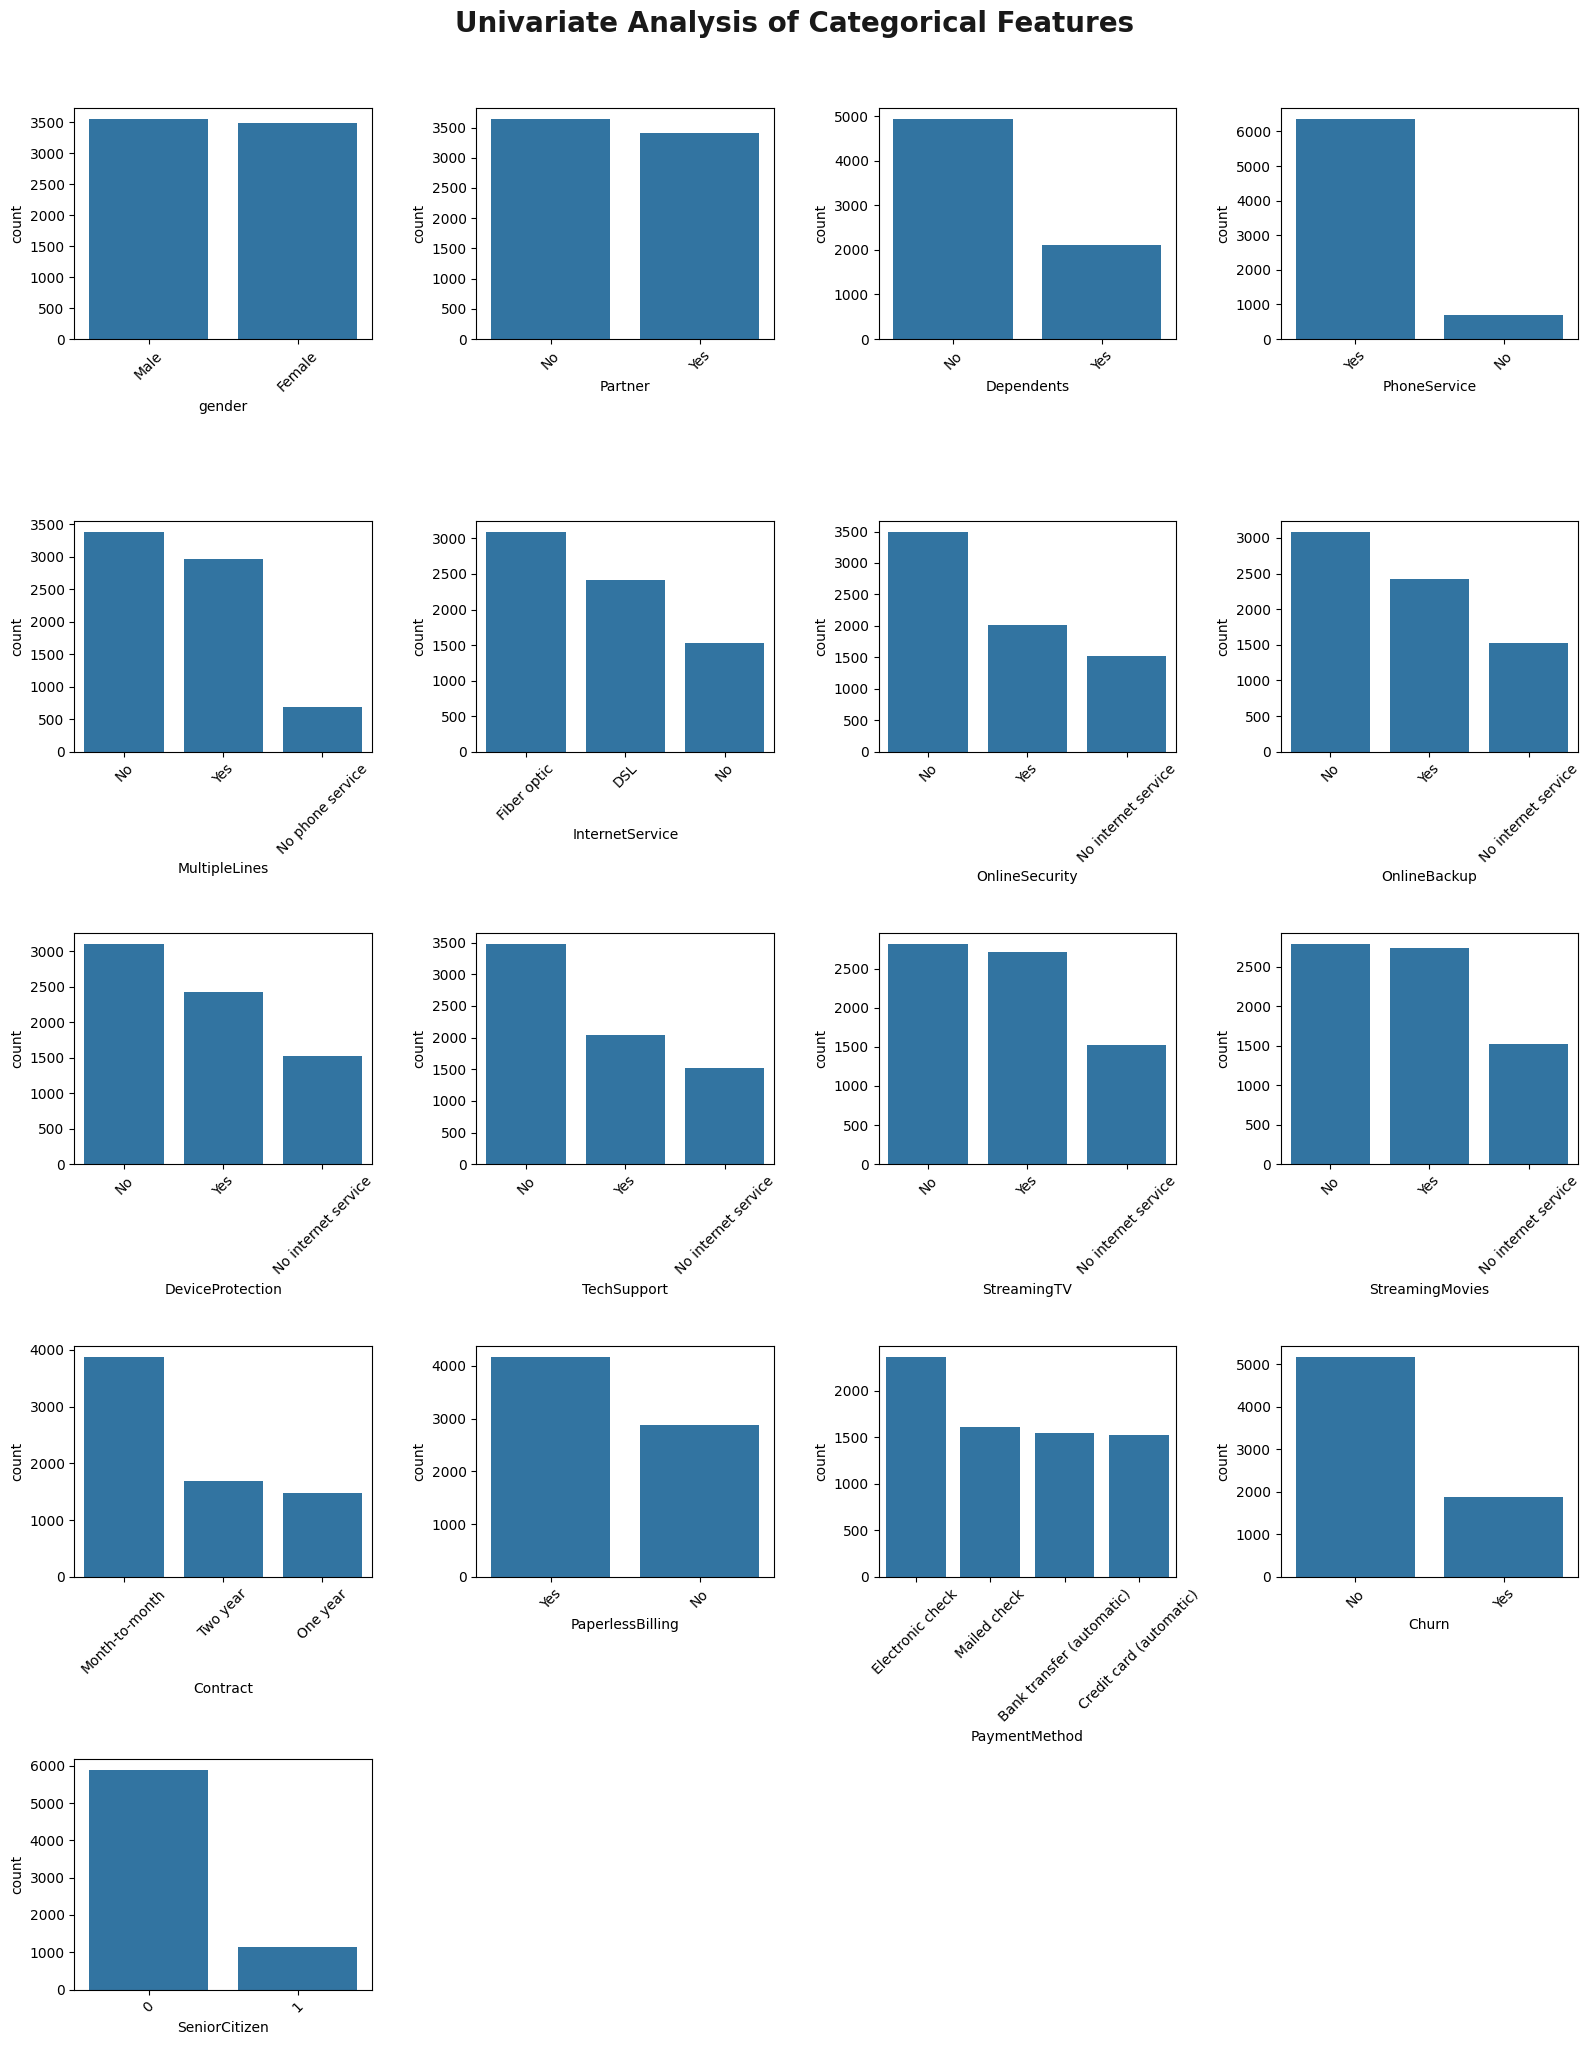

In [48]:
cols = 4
rows= 5

plt.figure(figsize=(16,20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.02)

for i, col in enumerate(categorical_features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


### Multivariate Analysis

### Ki kare - Cramers V analizi
* Her bir kategorik değişkenin target değişken ile istatiksel anlamlılığı ve gücü ölçmek için
* ki kare testi için h0 : değişkenler birbirinden bağımsızdır.
* p  =<0.5 ise H0 red

In [54]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

results = []

for col in categorical_features:
    table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(table)
    cramer = cramers_v(df[col], df['Churn'])
    reject_h0 = "h0 red" if p < 0.05 else "h0 reddedilemez"

    results.append({
        "Değişken": col,
        "p-değeri": round(p, 4),
        "Cramér’s V": round(cramer, 4),
        "H₀ Reddedilsin mi?": reject_h0
    })

chi_df = pd.DataFrame(results)
chi_df

,Değişken,p-değeri,Cramér’s V,H₀ Reddedilsin mi?
0,gender,0.4866,0.0083,h0 reddedilemez
1,Partner,0.0000,0.1501,h0 red
2,Dependents,0.0000,0.1639,h0 red
3,PhoneService,0.3388,0.0114,h0 reddedilemez
4,MultipleLines,0.0035,0.0401,h0 red
5,InternetService,0.0000,0.3225,h0 red
6,OnlineSecurity,0.0000,0.3474,h0 red
7,OnlineBackup,0.0000,0.2923,h0 red
8,DeviceProtection,0.0000,0.2816,h0 red
9,TechSupport,0.0000,0.3429,h0 red


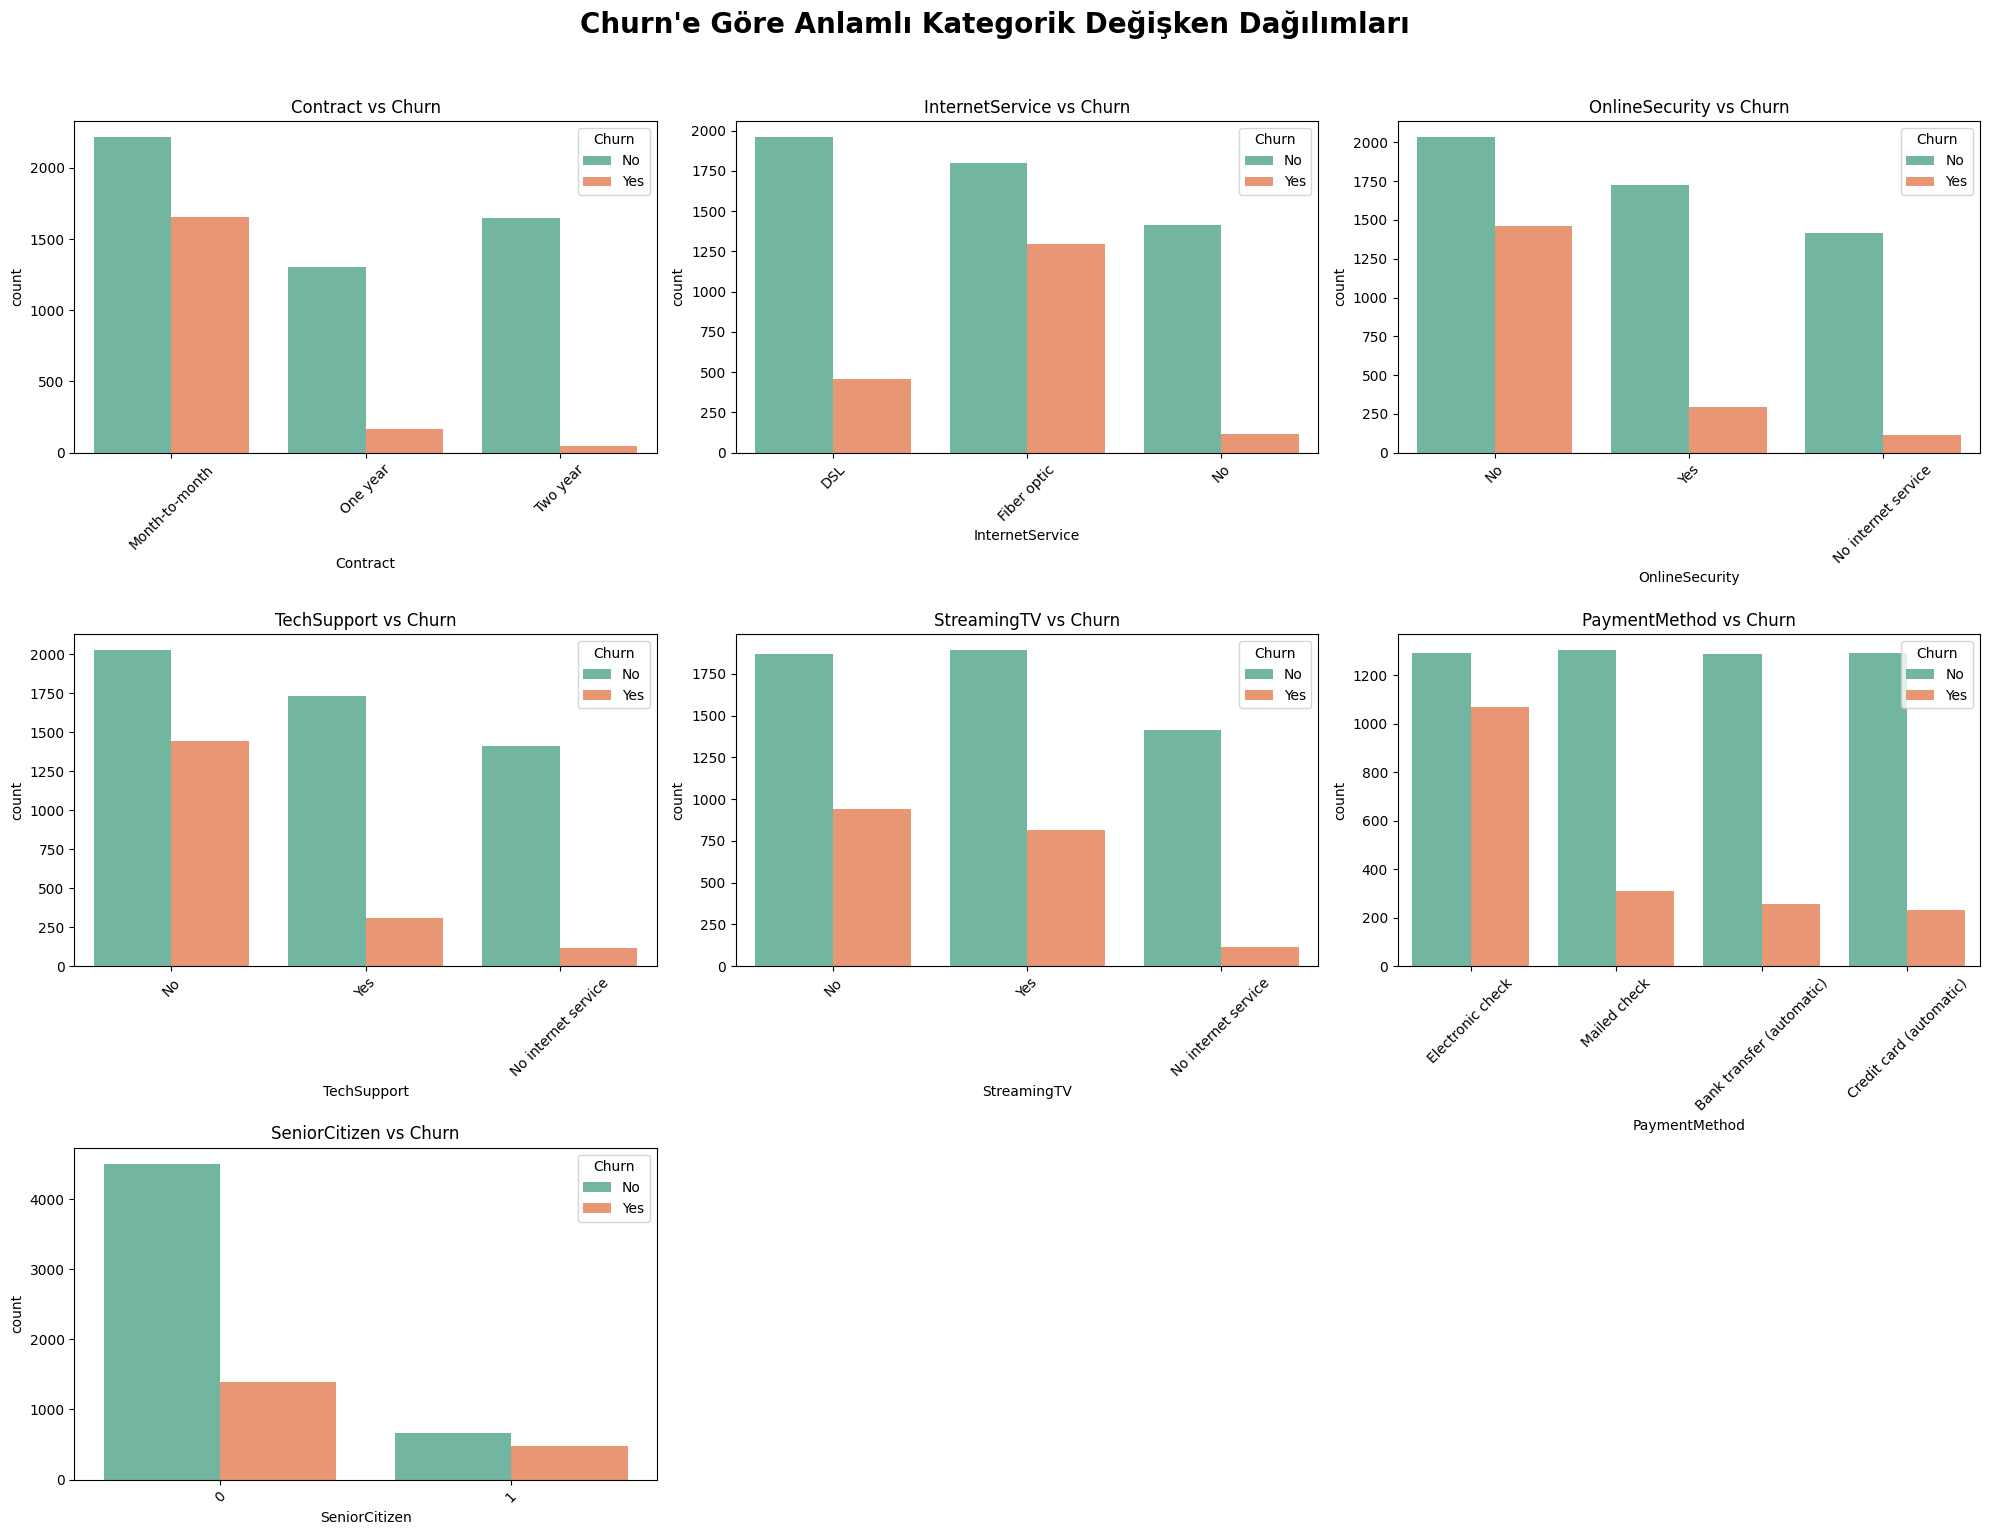

In [55]:
important_cats = [
    'Contract', 'InternetService', 'OnlineSecurity',
    'TechSupport', 'StreamingTV', 'PaymentMethod', 'SeniorCitizen'
]

plt.figure(figsize=(20, 15))
plt.suptitle("Churn'e Göre Anlamlı Kategorik Değişken Dağılımları", fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(important_cats):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()


- contract:  "Month-to-month" müşterilerinde churn oranı belirgin şekilde yüksek.
- InternetService : "Fiber optic" kullanıcıları daha yüksek churn eğiliminde.
- OnlineSecurity & TechSupport: Hizmet almayanlar churn etmeye daha yatkın.
- StreamingTV: "No" diyenlerin churn oranı daha düşük → ilginç bir ters korelasyon olabilir.
- PaymentMethod: "Electronic check" kullananlarda churn daha yüksek.
- SeniorCitizen: Yaşlı müşterilerde churn oranı gözle görülür biçimde daha fazla.


### Multivariate Analysis for numerical columns

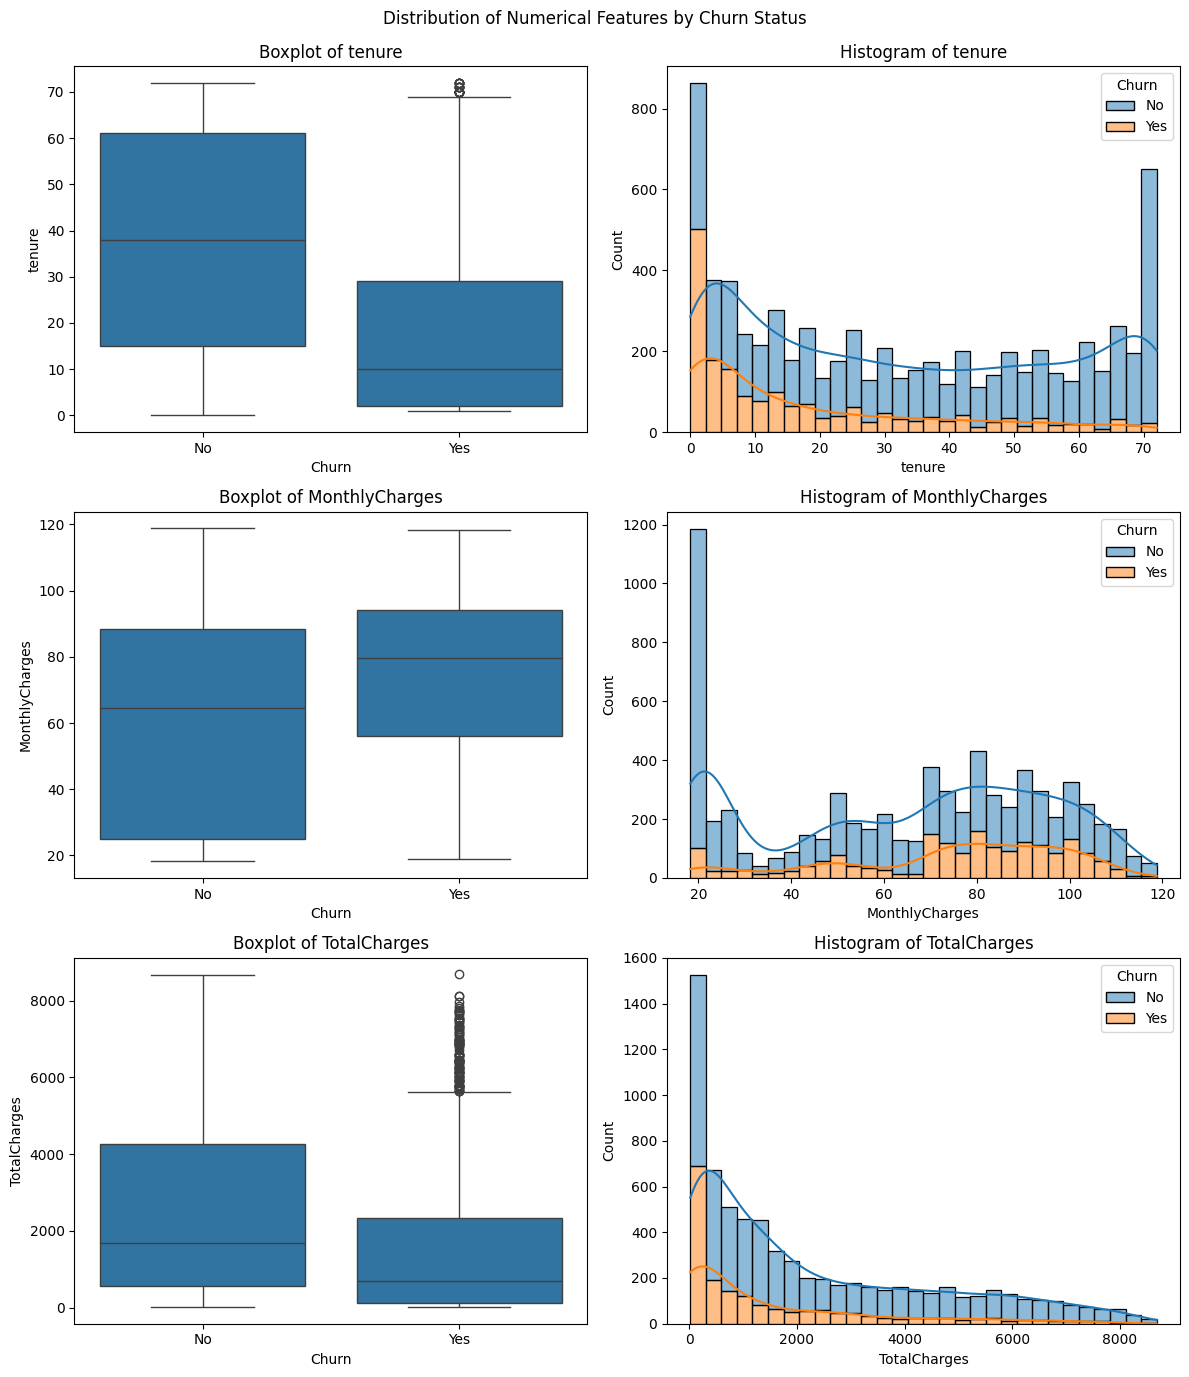

In [63]:
fig, ax = plt.subplots(3, 2, figsize=(12, 14))
fig.suptitle("Distribution of Numerical Features by Churn Status")

for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='Churn', y=col,  ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)

    sns.histplot(data=df, x=col, hue='Churn', bins=30, kde=True,multiple='stack', ax=ax[i, 1])          
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.94)

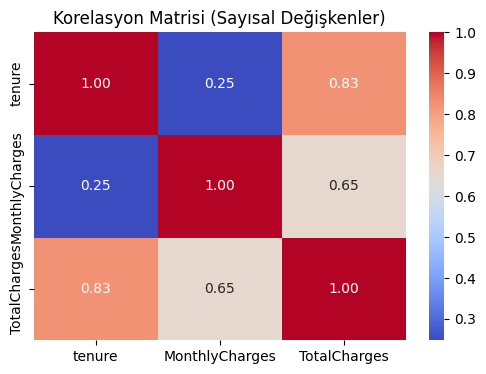

In [64]:
corr = df[numerical_features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi (Sayısal Değişkenler)")
plt.show()


## Churn Değişkenin genel dağılımı

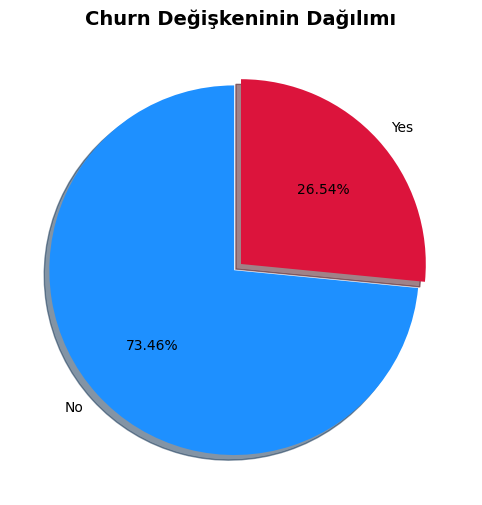

In [73]:
percentage = df['Churn'].value_counts(normalize=True) * 100
labels = ['No', 'Yes']

fig, ax = plt.subplots(figsize=(8, 6))
explode = (0.05, 0)  
colors = ['#1E90FF', '#DC143C']

ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%',
       explode=explode, shadow=True, colors=colors)
plt.title("Churn Değişkeninin Dağılımı", fontsize=14, fontweight='bold')
plt.show()


* veri setindeki müşterilerin churn durumu
* yukarıdaki grafik bize churne eden müşterilerin daha az olduğunu gösteriyor, yani dengesiz bir veri bunun için modelleme aşamasında class_weight ya da SMOTE kullanabiliriz

### Kategorik Değişkenlerin Churn ile İlişkisi

proportion
Contract       Churn            
Month-to-month No      57.290323
               Yes     42.709677
One year       No      88.730482
               Yes     11.269518
Two year       No      97.168142
               Yes      2.831858

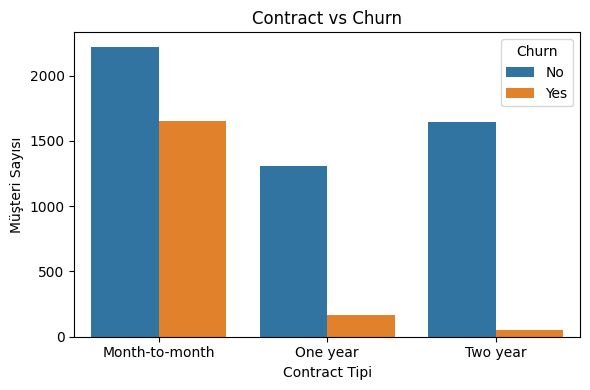

In [76]:
# Contract değişkeninin churn üzerinde etkisi var mı?

display((df.groupby('Contract')['Churn'].value_counts(normalize=True) * 100).to_frame().rename(columns={'Churn': 'Proportion'}))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract vs Churn")
plt.xlabel("Contract Tipi")
plt.ylabel("Müşteri Sayısı")
plt.tight_layout()
plt.show()


proportion
InternetService Churn            
DSL             No      81.040892
                Yes     18.959108
Fiber optic     No      58.107235
                Yes     41.892765
No              No      92.595020
                Yes      7.404980

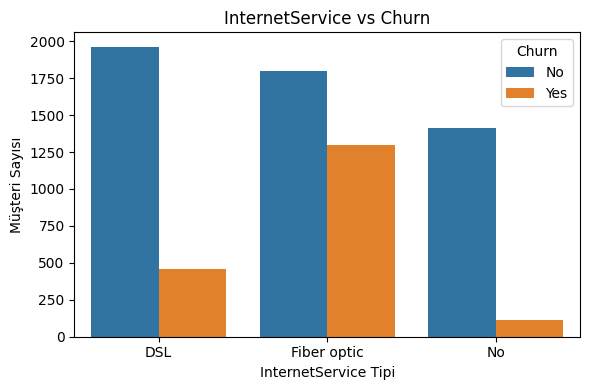

In [77]:
# InternetService değişkeninin churn üzerinde etkisi var mı?

display((df.groupby('InternetService')['Churn'].value_counts(normalize=True) * 100).to_frame().rename(columns={'Churn': 'Proportion'}))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("InternetService vs Churn")
plt.xlabel("InternetService Tipi")
plt.ylabel("Müşteri Sayısı")
plt.tight_layout()
plt.show()


proportion
PaymentMethod             Churn            
Bank transfer (automatic) No      83.290155
                          Yes     16.709845
Credit card (automatic)   No      84.756899
                          Yes     15.243101
Electronic check          No      54.714588
                          Yes     45.285412
Mailed check              No      80.893300
                          Yes     19.106700

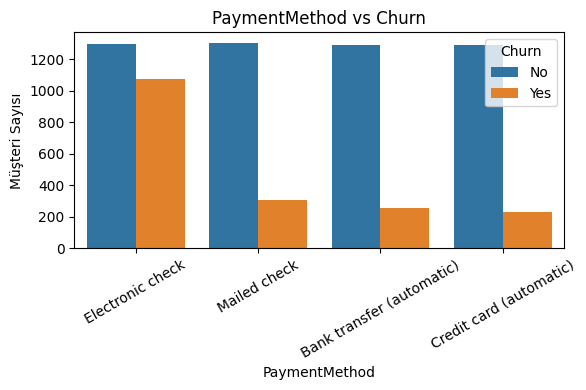

In [78]:
# PaymentMethod değişkeninin churn üzerinde etkisi var mı?

display((df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True) * 100).to_frame().rename(columns={'Churn': 'Proportion'}))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("PaymentMethod vs Churn")
plt.xlabel("PaymentMethod")
plt.ylabel("Müşteri Sayısı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


proportion
TechSupport         Churn            
No                  No      58.364526
                    Yes     41.635474
No internet service No      92.595020
                    Yes      7.404980
Yes                 No      84.833659
                    Yes     15.166341

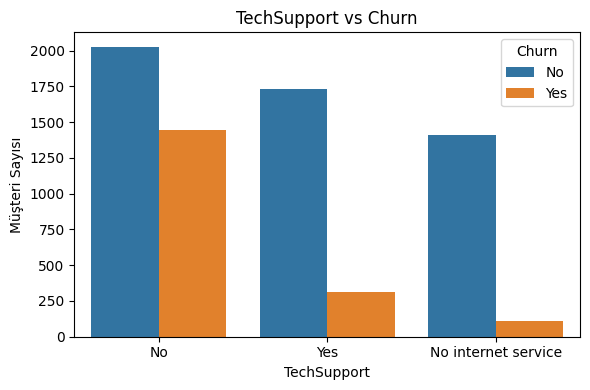

In [79]:
# TechSupport değişkeninin churn üzerinde etkisi var mı?

display((df.groupby('TechSupport')['Churn'].value_counts(normalize=True) * 100).to_frame().rename(columns={'Churn': 'Proportion'}))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title("TechSupport vs Churn")
plt.xlabel("TechSupport")
plt.ylabel("Müşteri Sayısı")
plt.tight_layout()
plt.show()


proportion
OnlineSecurity      Churn            
No                  No      58.233276
                    Yes     41.766724
No internet service No      92.595020
                    Yes      7.404980
Yes                 No      85.388806
                    Yes     14.611194

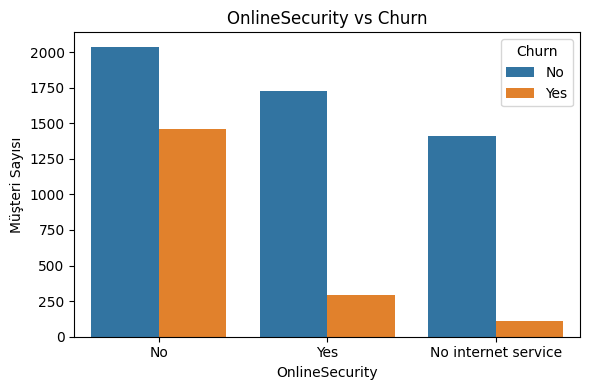

In [80]:
# OnlineSecurity değişkeninin churn üzerinde etkisi var mı?

display((df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True) * 100).to_frame().rename(columns={'Churn': 'Proportion'}))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title("OnlineSecurity vs Churn")
plt.xlabel("OnlineSecurity")
plt.ylabel("Müşteri Sayısı")
plt.tight_layout()
plt.show()


proportion
SeniorCitizen Churn            
0             No      76.393832
              Yes     23.606168
1             No      58.318739
              Yes     41.681261

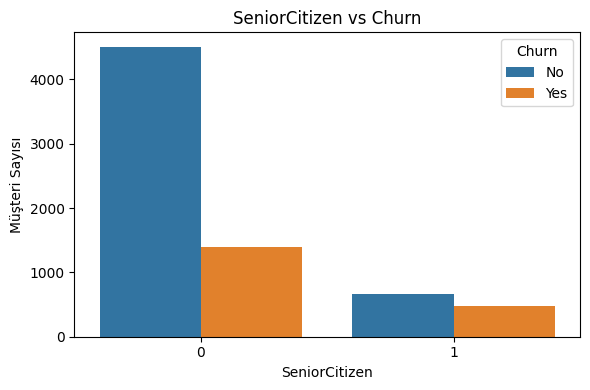

In [81]:
# SeniorCitizen değişkeninin churn üzerinde etkisi var mı?

display((df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True) * 100).to_frame().rename(columns={'Churn': 'Proportion'}))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title("SeniorCitizen vs Churn")
plt.xlabel("SeniorCitizen")
plt.ylabel("Müşteri Sayısı")
plt.tight_layout()
plt.show()


### Sayısal Değişkenlerin Churn ile İlişkisi

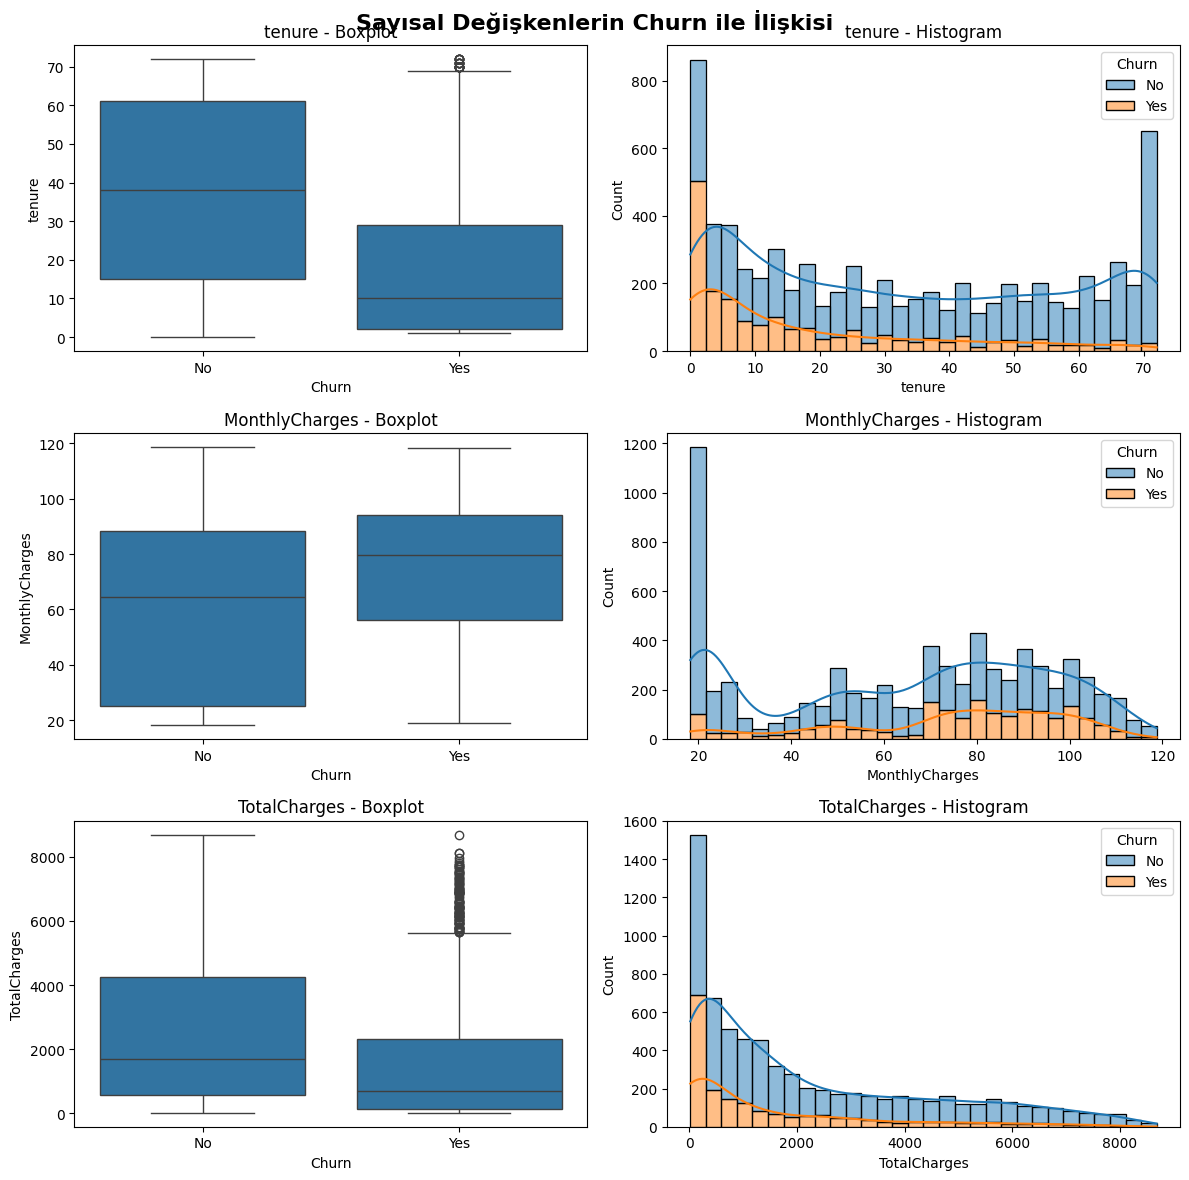

In [82]:
# Sayısal değişkenlerin Churn'e göre dağılımı

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(len(num_cols), 2, figsize=(12, 12))
fig.suptitle('Sayısal Değişkenlerin Churn ile İlişkisi', fontsize=16, fontweight='bold')

for i, col in enumerate(num_cols):
    # Boxplot
    sns.boxplot(data=df, x='Churn', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'{col} - Boxplot')

    # Histogram
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30, kde=True, ax=ax[i,1])
    ax[i,1].set_title(f'{col} - Histogram')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


### Özet – Churn’e Etki Eden Değişkenler

* **Contract**  
- Month-to-month sözleşmelilerde churn oranı yükse
- Sözleşme süresi uzadıkça iptal ihtimali düşüyor.

* **InternetService**   
- Fiber optic kullanıcılarının neredeyse yarısı churn ediyor.  
- DSL ve No internet grupları çok daha güvenli.

* **PaymentMethod**
- Electronic check ödeyenlerde churn oranıtavan 
- Otomatik banka / kredi kartı ödemeleri sadakati artırıyo

* **TechSupport**  
- Destek almayan müşteriler kolayca kopuyor.  
- Tech Support =Yes grubunda churn neredeyse yarıya iniyor

* **OnlineSecurity**
- Güvenlik hizmeti yoksa churn oranı %42 civarı*
- Hizmeti alanlarda iptal ihtimali ***bariz*** azalıyor.

* **SeniorCitizen**  
- aşlı (1) segmentinde churn oranı gençlere göre  yaklaşık 2×
- 65+ müşteriler özel ilgi bekliyor.

* **tenure** 
- < 1 yıl kalmış müşterilerde churn zirvede
- Süre uzadıkça iptal ihtimali çakılıyor

 * **MonthlyCharges**  
- Yüksek fatura = yüksek churn; fiyat hassasiyeti güçlü.  
- 60 dolar altına inen ücretlerde risk belirgin şekilde düşüyor.

*  **TotalCharges**  
- Churn edenlerin toplam harcaması çok düşük (sadakat yok).  
- Uzun vadede kalan müşteriler 4-5× daha fazla gelir bırakıyor.